### Import

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import pandas as pd
import json

### Load files

In [14]:

nc = pd.read_json('../data/selected/df_scored_nodes_log.json', orient='records')
ways = pd.read_json('../data/selected/df_selected_ways.json', orient='records', lines=True)

road_lats = []
road_lons = []
road_scores = []
road_ncn_status = []

### Nodes coordinates matching 

In [15]:

print("Extraction started")

count = 0
for idx, way in ways.sort_values(by="score", ascending=False).iloc[0:2000].iterrows():
    nodes_ids = way['nodes']
    
    # Filter nodes DataFrame for current way's nodes
    filtered_nodes = nc[nc['id'].isin(nodes_ids)]

    if filtered_nodes.empty:
        print(f"No nodes found for way with index {idx}")
        continue
    
    # Extract latitudes and longitudes
    coor_lat = filtered_nodes['lat'].tolist()
    coor_lon = filtered_nodes['lon'].tolist()
    
    # Append to road_lats and road_lons
    road_lats.extend([[coor_lat[i], coor_lat[i + 1]] for i in range(len(coor_lat) - 1)])
    road_lons.extend([[coor_lon[i], coor_lon[i + 1]] for i in range(len(coor_lon) - 1)])
    
    # Append score for each segment in the way
    road_scores.extend([way['score']] * (len(coor_lat) - 1))
    road_ncn_status.extend([filtered_nodes.iloc[0]['ncn']] * (len(coor_lat) - 1))
    
    # Print progress every 1000 ways
    if (count + 1) % 10 == 0:
        print(f"Processed {count + 1} / 2000 ways")
    count += 1

print("Nodes coordinates matched")

Extraction started
Processed 10 / 2000 ways
Processed 20 / 2000 ways
Processed 30 / 2000 ways
Processed 40 / 2000 ways
Processed 50 / 2000 ways
No nodes found for way with index 41256
Processed 60 / 2000 ways
Processed 70 / 2000 ways
Processed 80 / 2000 ways
Processed 90 / 2000 ways
Processed 100 / 2000 ways
Processed 110 / 2000 ways
Processed 120 / 2000 ways
Processed 130 / 2000 ways
Processed 140 / 2000 ways
Processed 150 / 2000 ways
Processed 160 / 2000 ways
Processed 170 / 2000 ways
Processed 180 / 2000 ways
Processed 190 / 2000 ways
Processed 200 / 2000 ways
Processed 210 / 2000 ways
Processed 220 / 2000 ways
Processed 230 / 2000 ways
Processed 240 / 2000 ways
Processed 250 / 2000 ways
Processed 260 / 2000 ways
Processed 270 / 2000 ways
Processed 280 / 2000 ways
Processed 290 / 2000 ways
Processed 300 / 2000 ways
Processed 310 / 2000 ways
Processed 320 / 2000 ways
Processed 330 / 2000 ways
Processed 340 / 2000 ways
Processed 350 / 2000 ways
Processed 360 / 2000 ways
Processed 370 

In [16]:
print(len(road_lons))
print(len(road_ncn_status))

10659
10659


### Plotting

Processed 1000 / 10659 segments
Processed 2000 / 10659 segments
Processed 3000 / 10659 segments
Processed 4000 / 10659 segments
Processed 5000 / 10659 segments
Processed 6000 / 10659 segments
Processed 7000 / 10659 segments
Processed 8000 / 10659 segments
Processed 9000 / 10659 segments
Processed 10000 / 10659 segments
Processed 10659 / 10659 segments


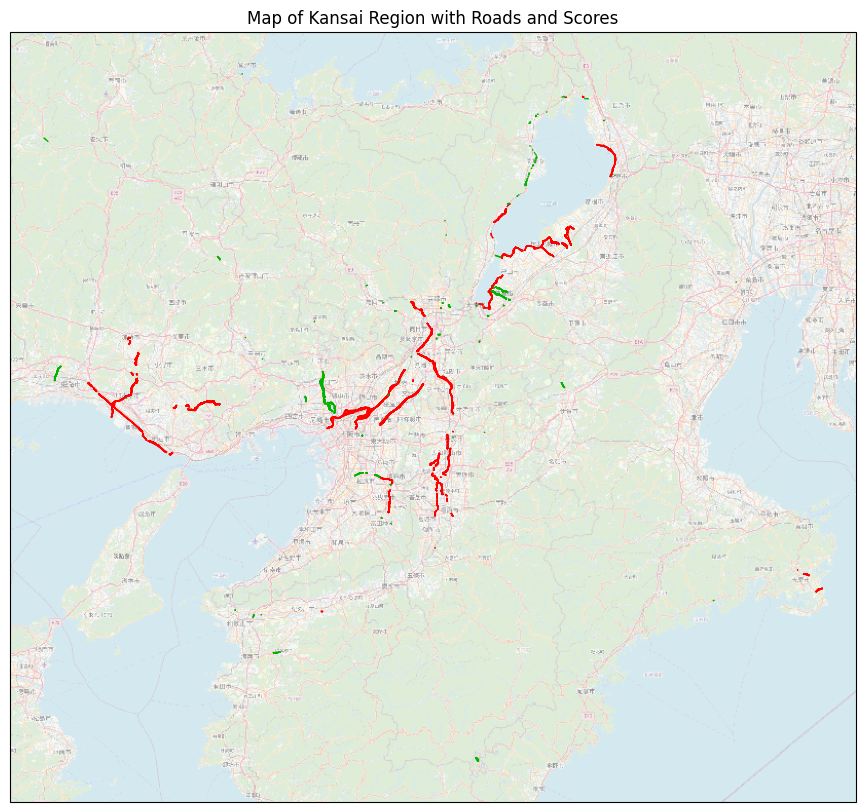

In [17]:

min_score = min(road_scores)
max_score = max(road_scores)

# Create a figure and axis with Cartopy Mercator projection
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.Mercator()})

# Add a light grey background rectangle
ax.add_patch(plt.Rectangle((-180, -90), 360, 180, color='lightgrey', transform=ccrs.PlateCarree(), zorder=-1))

# Use OpenStreetMap as background using Cartopy
request = cimgt.OSM()
ax.add_image(request, 10, alpha=0.5)  # Use a zoom level of 10 and set alpha to 0.3 for reduced intensity

# Define a function to map scores to colors
def score_to_color(score, min_score, max_score):
    low_color = [1, 0, 0]    # Red
    high_color = [0, 0.7, 0]   # Green
    
    # Interpolate between low and high colors based on the score
    ratio = (score - min_score) / (max_score - min_score)
    color = [(1 - ratio) * low_color[i] + ratio * high_color[i] for i in range(3)]
    
    return color

# Define a function to map scores to ncn status
def ncn_status_to_color(ncn_status):
    if ncn_status:
        return [1, 0, 0] 
    return [0, 0.7, 0]

# Plot each road segment with colors based on scores
for i in range(len(road_lons)):
    road_lon = road_lons[i]
    road_lat = road_lats[i]
    road_score = road_scores[i]
    road_color = ncn_status_to_color(road_ncn_status[i])
    ax.plot(road_lon, road_lat, marker=None, color=road_color, linewidth=1, transform=ccrs.PlateCarree())
    
    # Print progress every 1000 segments
    if (i + 1) % 1000 == 0 or (i + 1) == len(road_lons):
        print(f"Processed {i + 1} / {len(road_lons)} segments")

# Set extent to include all plotted points
min_lon = min(min(road_lons, key=min))
max_lon = max(max(road_lons, key=max))
min_lat = min(min(road_lats, key=min))
max_lat = max(max(road_lats, key=max))
ax.set_extent([min_lon - 0.1, max_lon + 0.1, min_lat - 0.1, max_lat + 0.1], crs=ccrs.PlateCarree())

# Save as high-resolution PNG file
plt.savefig('kansai_map.png', dpi=300)

# Show the plot
plt.title('Map of Kansai Region with Roads and Scores')
plt.show()